In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Deserializing les dades

std_df = pd.read_pickle('../data/standard_df.pkl')
std_df.head()

,place_type,capacity,is_free,altitude,country,region,latitude,longitude,num_nearby_routes,num_services
15,0,18.0,1,7.831220,0,3,3.775000,0.887562,4.477337,1.098612
31,0,6.0,1,7.669028,0,3,3.770063,1.154482,2.484907,1.098612
35,0,2.0,1,7.626083,1,12,3.771733,1.146729,1.098612,0.693147
36,0,6.0,1,7.710205,2,13,3.773016,0.958936,4.510860,1.609438
39,1,160.0,0,6.401917,0,3,3.764736,1.266018,3.178054,1.945910


In [18]:
# Regressió logística
# Parteixo les dades
from sklearn.model_selection import train_test_split

X = std_df.drop('is_free', 1)
y = std_df.is_free

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
# Entreno el model
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()
model = logreg.fit(X_train, y_train)

In [20]:
# Prediccions del model
predicted = model.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1], dtype=int64)

<module 'matplotlib.pyplot' from 'C:\\Users\\sara-\\anaconda3\\envs\\bookEnv\\lib\\site-packages\\matplotlib\\pyplot.py'>

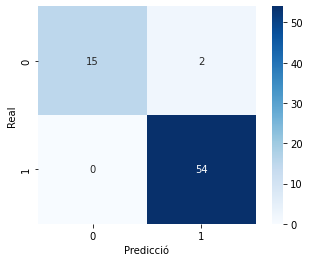

In [21]:
# Matriu de confusió
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predicted)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("Predicció")
plt.ylabel("Real")
plt.title("Figura 1: Matriu de confusió")
plt

In [22]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted)

0.971830985915493

In [23]:
# Precisió
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.96      1.00      0.98        54

    accuracy                           0.97        71
   macro avg       0.98      0.94      0.96        71
weighted avg       0.97      0.97      0.97        71



In [24]:
# Corba de ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

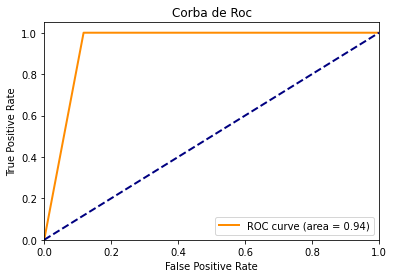

In [27]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figura 2: Corba de Roc')
plt.legend(loc="lower right")
plt.show()